# TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
import pandas as pd

# Carga el dataset
df = pd.read_csv("/content/dataset_banco.csv")

# Elimina las filas con valores nulos en las columnas especificadas
columnas_con_nulos = ["job", "marital", "education", "balance", "duration", "pdays"]
df = df.dropna(subset=columnas_con_nulos)

# Guarda el DataFrame resultante
new1 = df.to_csv("/content/archivonew1.csv")





##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

In [ ]:


import pandas as pd

# Carga el dataset
new2 = pd.read_csv("/content/archivonew1.csv")

columnas_a_eliminar = ['contact', 'duration', 'month', 'day', 'campaign', 'pdays', 'previous', 'marital']

# Eliminar las columnas
new2 = new2.drop(columnas_a_eliminar, axis=1)

# Eliminar filas duplicadas
new2 = new2.drop_duplicates()

# Guardar el DataFrame en un archivo CSV
new2.to_csv("/content/archivonew2.csv", index=False)

# Leer el archivo recién guardado para asegurarse de que esté bien
new2 = pd.read_csv("/content/archivonew2.csv")

# Visualizar las primeras filas del DataFrame new2
print(new2.head())




   Unnamed: 0  age           job  education default  balance housing loan  \
0           0   58    management   tertiary      no   2143.0     yes   no   
1           1   44    technician  secondary      no     29.0     yes   no   
2           2   33  entrepreneur  secondary      no      2.0     yes  yes   
3           3   47   blue-collar    unknown      no   1506.0     yes   no   
4           4   33       unknown    unknown      no      1.0      no   no   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no  


##4.3 Filas repetidas

Media de la edad: 40.937034005177104
Valores únicos de la edad: [58.         44.         33.         47.         35.         28.
 42.         43.         41.         29.         53.         57.
 51.         45.         60.         56.         32.         25.
 40.         39.         52.         46.         36.         49.
 59.         37.         50.         54.         55.         48.
 24.         38.         31.         30.         27.         34.
 23.         26.         61.         40.93703401 22.         21.
 20.         66.         62.         83.         75.         67.
 70.         65.         68.         64.         69.         72.
 71.         19.         76.         85.         63.         90.
 82.         73.         74.         78.         80.         94.
 79.         77.         86.         95.         81.         18.
 89.         84.         87.         92.         93.         88.        ]


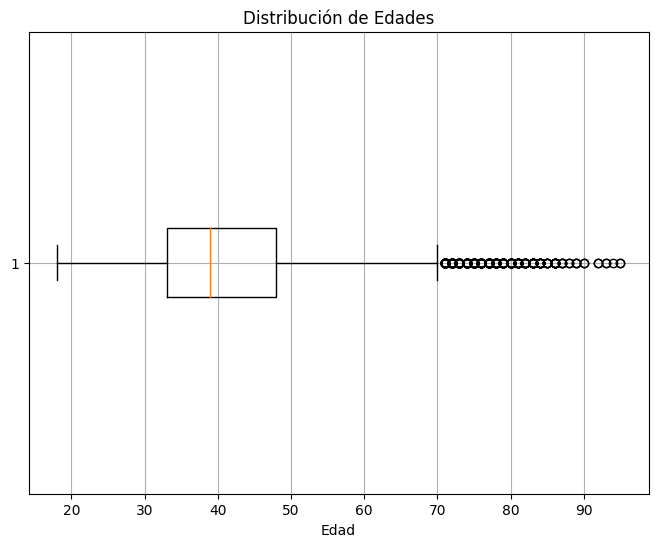

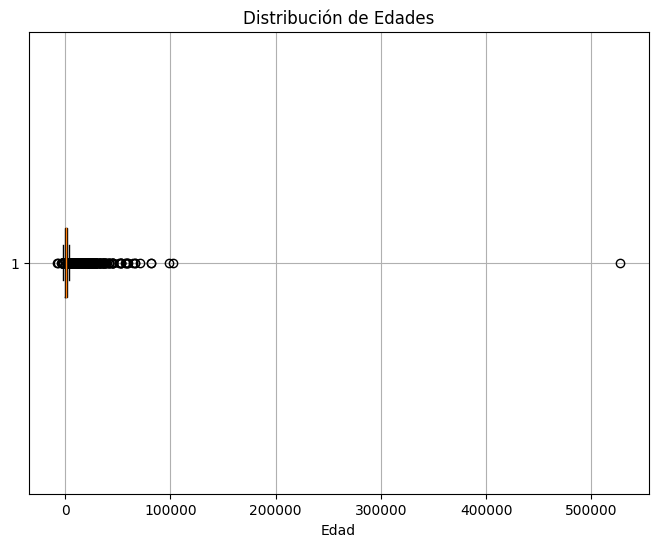

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Calcula la media de la columna "age" excluyendo valores mayores a 100
media_edad = df[df["age"] <= 100]["age"].mean()

# Reemplaza los valores mayores a 100 por la media
df.loc[df["age"] > 100, "age"] = media_edad

# Imprime la media y los valores únicos
print(f"Media de la edad: {media_edad}")
print(f"Valores únicos de la edad: {df['age'].unique()}")

# Guarda el DataFrame resultante
df.to_csv("/content/archivonew2.csv")


plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.boxplot(df['balance'], vert=False)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.grid(True)
plt.show()






##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [ ]:
import pandas as pd

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Convierte los valores "UNK" a "unknown" en la columna "poutcome"
df.loc[df["poutcome"] == "UNK", "poutcome"] = "unknown"

# Guarda el DataFrame resultante
df.to_csv("/content/archivonew2.csv")


In [ ]:
import pandas as pd



nombres_unicos_job = df['job'].unique()

# Imprimir los nombres únicos
print("Nombres únicos en la columna 'job':")
for nombre in nombres_unicos_job:
    print(nombre)

nombres_a_unificar = {
    'Management': 'management',
    'MANAGEMENT': 'management',
    'admin':'administrative',
    'Self-employed': 'self-employed',
    'Retired':'retired',
    'Services':'service'
    # Agrega más nombres si es necesario
}

# Reemplaza los nombres en la columna "job"
df['job'] = df['job'].replace(nombres_a_unificar)

# Imprime los nombres únicos actualizados en la columna "job"
print("Nombres únicos actualizados en la columna 'job':")
print(df['job'].unique())

# Guarda el DataFrame resultante
df.to_csv("/content/archivonew2.csv")


Nombres únicos en la columna 'job':
management
technician
entrepreneur
blue-collar
unknown
Management
retired
admin.
services
self-employed
MANAGEMENT
Self-employed
unemployed
housemaid
student
Services
Retired
administrative
Nombres únicos actualizados en la columna 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'service' 'administrative']


## Conclusiones

que más podríamos haber hecho??

1- quitar las filas donde había nulos, porque tenemos muchas muestras
2- no eliminamos ninguna columna
3- data.describe para ver los estadisticos, si el std > 1, vemos que hay mas de un numero.
4-eliminar las filas duplicadas
5- verificar los outliners de las variables numericas (hacer boxplot) fijarnos en edad, duration (valores negativos), eliminar filas de previus > 100
6- mirar errores tipograficos (admin y administrativo unificar) (divorcios) (mobile, celular)



conclusiones:

dia y mes podrían ser irrelevantes.

1-graficamos variables categoricas con graficos de barras.
2-podemos borrar contact, duration, month, day, campaign, pdays y previous, marital
3-grafico dinero relacionado con edad
-analisis univariante
4-ni edad ni balance no hay diferencias en adquision de nuestro producto
5-establecer algunos rangos 18-25, 26-60, >60
6- hacer tabla de ver los que convierten, cuanto tienen en su balance
7- hacer tabla de ver los que convierten, a que se dedican
8- ver si tienen una casa o no es indicatorio de algo??
analisis bivariado, ver relaciones entre variables
9- pintar tasa de conversion con distintas variables (edad, trabajo...)


   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   age           job  education  \
0             0             0           0  58.0    management   tertiary   
1             1             1           1  44.0    technician  secondary   
2             2             2           2  33.0  entrepreneur  secondary   
3             3             3           3  47.0   blue-collar    unknown   
4             4             4           4  33.0       unknown    unknown   

  default  balance housing loan poutcome   y grupo_edad  
0      no   2143.0     yes   no  unknown  no      26-60  
1      no     29.0     yes   no  unknown  no      26-60  
2      no      2.0     yes  yes  unknown  no      26-60  
3      no   1506.0     yes   no  unknown  no      26-60  
4      no      1.0      no   no  unknown  no      26-60  


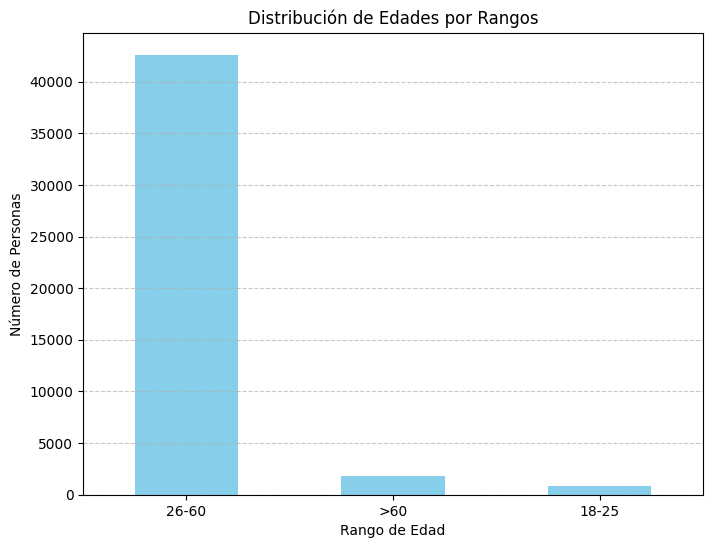

In [ ]:
#grafico de barras de edad agrupado en rangos

from scipy.stats import ttest_ind

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")


# Define los límites de los rangos de edad
bins = [18, 25, 60, float('inf')]  # Rangos: 18-25, 26-60, >60

# Define los nombres de los grupos
labels = ['18-25', '26-60', '>60']

# Agrega una nueva columna "grupo_edad" que indica el grupo de edad al que pertenece cada persona
df['grupo_edad'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Muestra las primeras filas del DataFrame con la nueva columna "grupo_edad"
print(df.head())


# Cuenta el número de personas en cada grupo de edad
conteo_por_grupo = df['grupo_edad'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_por_grupo.plot(kind='bar', color='skyblue')
plt.title('Distribución de Edades por Rangos')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


df.to_csv("/content/archivonew2.csv")

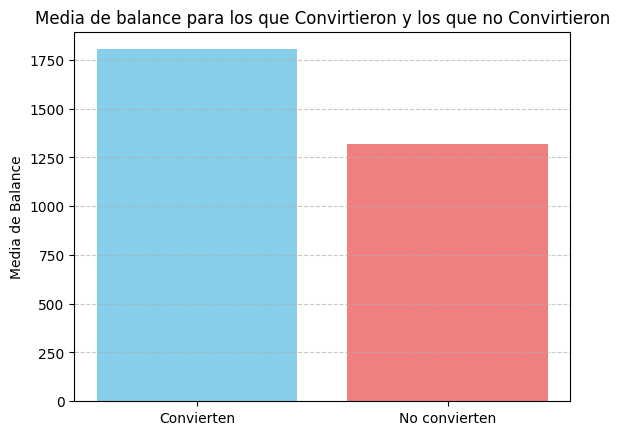

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Calcula la media del balance para aquellos que convierten (columna 'y' igual a 'yes')
media_balance_yes = df[df['y'] == 'yes']['balance'].mean()

# Calcula la media del balance para aquellos que no convierten (columna 'y' igual a 'no')
media_balance_no = df[df['y'] == 'no']['balance'].mean()

# Crea un gráfico de barras para visualizar las medias de los balances
fig, ax = plt.subplots()
ax.bar(['Convierten', 'No convierten'], [media_balance_yes, media_balance_no], color=['skyblue', 'lightcoral'])
ax.set_title('Media de balance para los que Convirtieron y los que no Convirtieron')
ax.set_ylabel('Media de Balance')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<ipython-input-78-06f996e441e7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo', y='Media del balance', data=df_plot, palette='pastel')


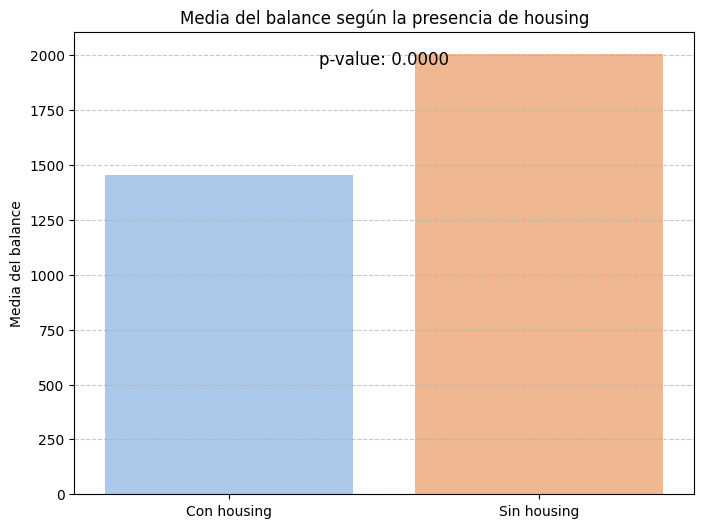

Valor t: -6.017071728148011
Valor p: 1.900377167192286e-09
Se rechaza la hipótesis nula: Hay una diferencia significativa en los balances para aquellos que tienen y los que no tienen 'housing'.


In [ ]:
##vimport pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Filtra los datos para aquellos que convierten ('yes')
convertidos = df[df['y'] == 'yes']

# Divide los datos en dos grupos según tengan o no tengan 'housing'
grupo_housing_si = convertidos[convertidos['housing'] == 'yes']['balance']
grupo_housing_no = convertidos[convertidos['housing'] == 'no']['balance']

# Realiza la prueba de t de Student
t_statistic, p_value = stats.ttest_ind(grupo_housing_si, grupo_housing_no, equal_var=False)

# Configura los datos para el gráfico de barras
data = {'Grupo': ['Con housing', 'Sin housing'],
        'Media del balance': [grupo_housing_si.mean(), grupo_housing_no.mean()]}

# Crea un DataFrame a partir de los datos
df_plot = pd.DataFrame(data)

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Grupo', y='Media del balance', data=df_plot, palette='pastel')
plt.title('Media del balance según la presencia de housing')
plt.ylabel('Media del balance')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agrega texto sobre el valor p
plt.text(0.5, grupo_housing_si.mean() + 500, f'p-value: {p_value:.4f}', ha='center', fontsize=12)

plt.show()

# Imprime el resultado
print("Valor t:", t_statistic)
print("Valor p:", p_value)

# Comprueba si el valor p es menor que el nivel de significancia (por ejemplo, 0.05) para rechazar la hipótesis nula
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: Hay una diferencia significativa en los balances para aquellos que tienen y los que no tienen 'housing'.")
else:
    print("No se rechaza la hipótesis nula: No hay suficiente evidencia para afirmar que hay una diferencia significativa en los balances para aquellos que tienen y los que no tienen 'housing'.")


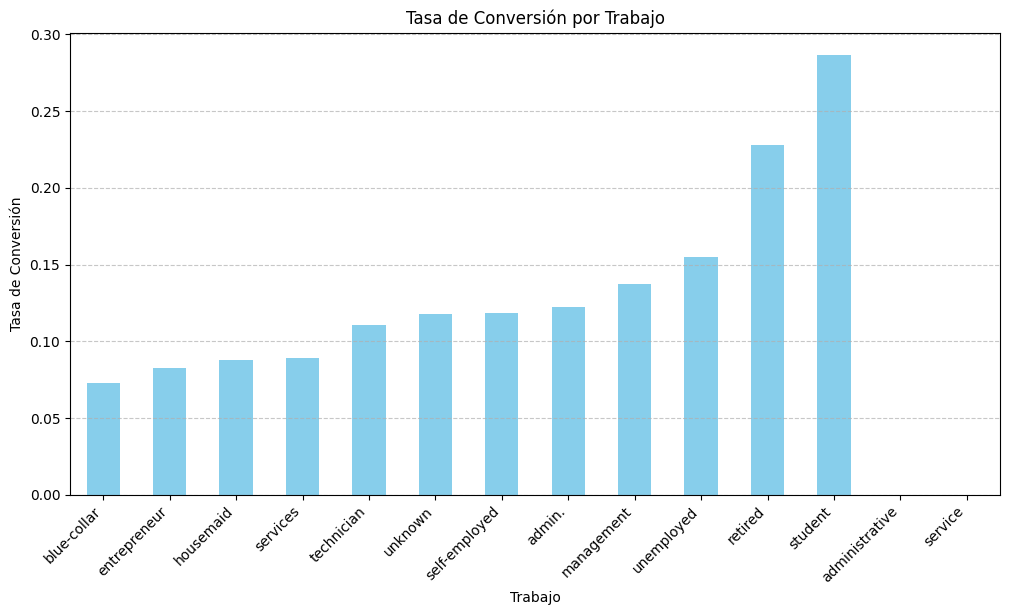

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Calcula el número de conversiones para cada categoría de trabajo
conversiones_por_trabajo = df[df['y'] == 'yes']['job'].value_counts()

# Calcula el número total de personas en cada categoría de trabajo
total_por_trabajo = df['job'].value_counts()

# Calcula la tasa de conversión para cada categoría de trabajo
tasa_conversion_por_trabajo = (conversiones_por_trabajo / total_por_trabajo).sort_values()

# Crea un gráfico de barras para visualizar la tasa de conversión por trabajo
plt.figure(figsize=(12, 6))
tasa_conversion_por_trabajo.plot(kind='bar', color='skyblue')
plt.title('Tasa de Conversión por Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


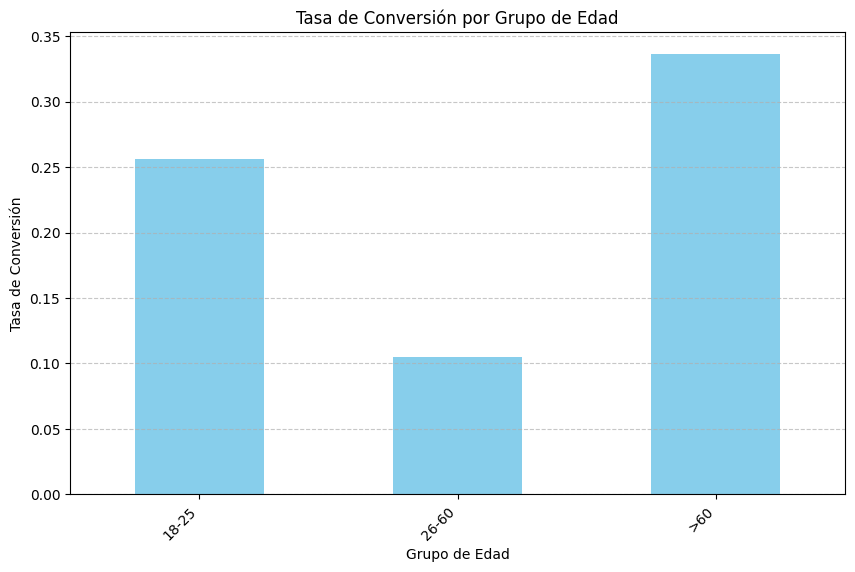

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
df = pd.read_csv("/content/archivonew2.csv")

# Calcula el número de conversiones para cada grupo de edad
conversiones_por_edad = df[df['y'] == 'yes']['grupo_edad'].value_counts()

# Calcula el número total de personas en cada grupo de edad
total_por_edad = df['grupo_edad'].value_counts()

# Calcula la tasa de conversión para cada grupo de edad
tasa_conversion_por_edad = (conversiones_por_edad / total_por_edad).sort_index()

# Crea un gráfico de barras para visualizar la tasa de conversión por grupo de edad
plt.figure(figsize=(10, 6))
tasa_conversion_por_edad.plot(kind='bar', color='skyblue')
plt.title('Tasa de Conversión por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
data.to_csv(ruta, index=False)